In [4]:
import axelrod as axl

from axelrod.random_ import random_choice

C, D = axl.Action.C, axl.Action.D

import time

In [5]:
import pandas as pd

from keras.models import Sequential, load_model

In [6]:
from keras.layers import (
    LSTM,
    Dense,
    Dropout,
    TimeDistributed,
)

In [7]:
import numpy as np
import glob
import matplotlib.pyplot as plt

In [8]:
def read_validation_dataframes(files_location):
    filenames = glob.glob(files_location)
    dfs = []
    for file in filenames:
        df = pd.read_csv(file, index_col=0)
        dfs.append(df)
    df = pd.concat(dfs).reset_index()
    return df

In [9]:
import imp

player_class = imp.load_source("player_class", "player_class.py")

**LSTM model sequence to sequence top twenty**

In [7]:
files_location = "hawk_output/output_lstm_top_twenty/validation_measures_run_*.csv"
df = read_validation_dataframes(files_location)

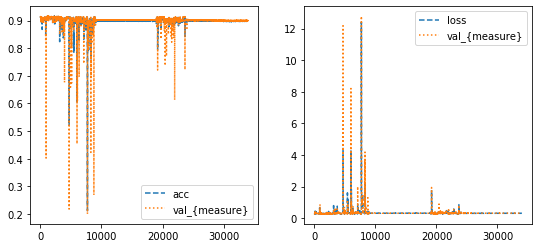

In [8]:
fig, ax = plt.subplots(ncols=2, figsize=(9, 4))

for i, measure in enumerate(['acc', 'loss']):
    ax[i].plot(df[measure], '--', label=measure);
    ax[i].plot(df[f'val_{measure}'], ':', label='val_{measure}');
    ax[i].legend();

**The player**

The model needs to read in by recreating the model because it was trained on hawk and on gpu

In [9]:
model = player_class.read_model_sequence_to_sequence("hawk_output/output_lstm_top_twenty/weights-over-time.h5")





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



In [10]:
float(model.predict(player_class.reshape_history_lstm_model([1, 0, 0]))[0][-1])

0.8492029905319214

**Stochastic version against basic strategies**

In [11]:
player = player_class.LSTMPlayer(model, player_class.reshape_history_lstm_model)

In [15]:
strategies_tournament = [s() for s in axl.basic_strategies] + [player]

In [16]:
tournament = axl.Tournament(players=strategies_tournament, turns=205, repetitions=10)

In [17]:
results = tournament.play(progress_bar=False)

//anaconda3/envs/rnn/lib/python3.6/site-packages/dask/base.py:835: UserWarning: The get= keyword has been deprecated. Please use the scheduler= keyword instead with the name of the desired scheduler like 'threads' or 'processes'
  warnings.warn("The get= keyword has been deprecated. "


//anaconda3/envs/rnn/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


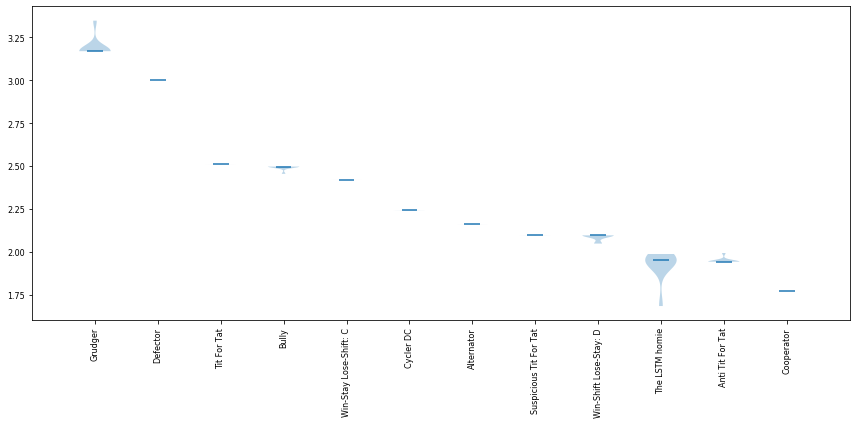

In [18]:
plot = axl.Plot(results)
p = plot.boxplot()
p.show()

**Non stochastic version**

In [19]:
player = player_class.LSTMPlayer(model, player_class.reshape_history_lstm_model, opening_probability=0)

In [20]:
strategies_tournament = [s() for s in axl.basic_strategies] + [player]

In [21]:
tournament = axl.Tournament(players=strategies_tournament, turns=205, repetitions=10)

In [22]:
results = tournament.play(progress_bar=False)

//anaconda3/envs/rnn/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


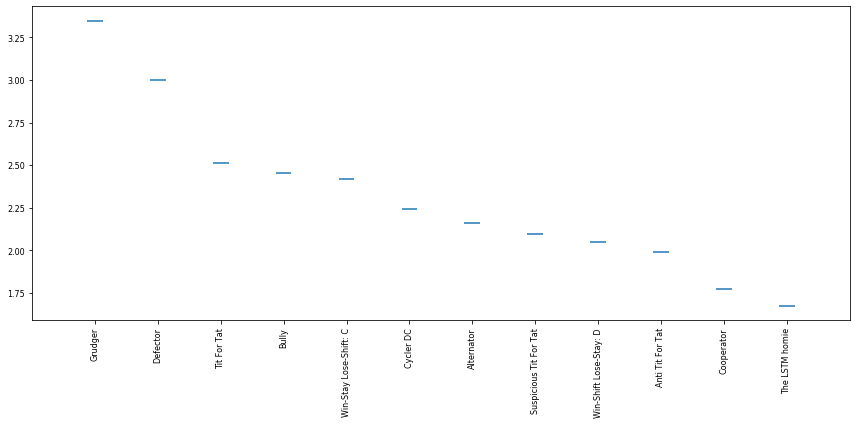

In [23]:
plot = axl.Plot(results)
p = plot.boxplot()
p.show()

In [24]:
player = player_class.LSTMPlayer(model, player_class.reshape_history_lstm_model, opening_probability=1)

In [25]:
strategies_tournament = [s() for s in axl.basic_strategies] + [player]
tournament = axl.Tournament(players=strategies_tournament, turns=205, repetitions=10)
results = tournament.play(progress_bar=False)

//anaconda3/envs/rnn/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


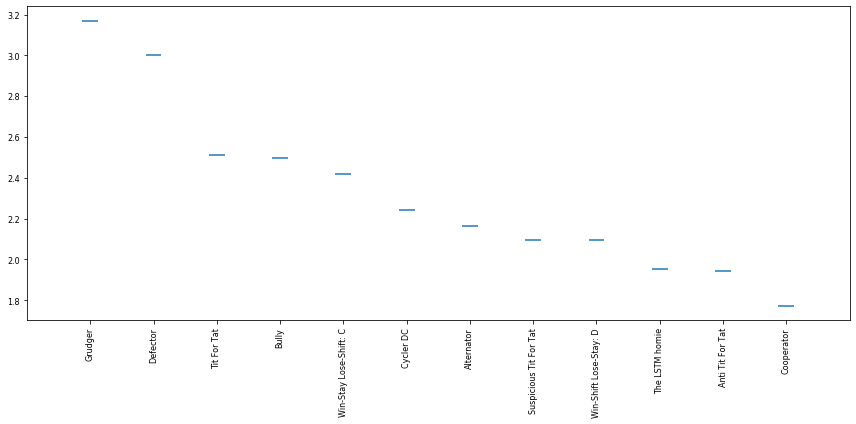

In [26]:
plot = axl.Plot(results)
p = plot.boxplot()
p.show()

**LSTM model sequence to sequence all**

In [27]:
files_location = "hawk_output/output_lstm/validation_measures_run_*.csv"
df = read_validation_dataframes(files_location)

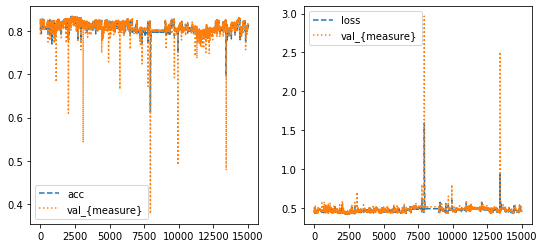

In [28]:
fig, ax = plt.subplots(ncols=2, figsize=(9, 4))

for i, measure in enumerate(['acc', 'loss']):
    ax[i].plot(df[measure], '--', label=measure);
    ax[i].plot(df[f'val_{measure}'], ':', label='val_{measure}');
    ax[i].legend();

In [29]:
model = player_class.read_model_sequence_to_sequence("hawk_output/output_lstm/weights-over-time.h5")

**Stochastic version**

In [30]:
player = player_class.LSTMPlayer(model, player_class.reshape_history_lstm_model)

In [31]:
strategies_tournament = [s() for s in axl.basic_strategies] + [player]
tournament = axl.Tournament(players=strategies_tournament, turns=205, repetitions=10)
results = tournament.play(progress_bar=False)

//anaconda3/envs/rnn/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


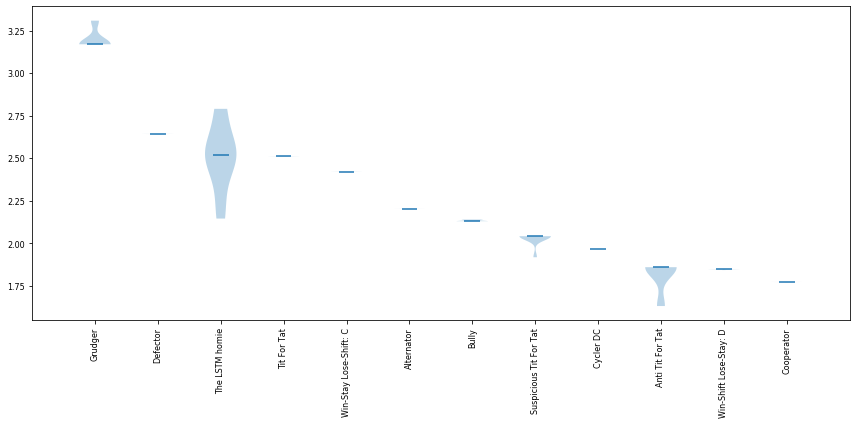

In [32]:
plot = axl.Plot(results)
p = plot.boxplot()
p.show()

**non stochastic**

In [33]:
player = player_class.LSTMPlayer(model, player_class.reshape_history_lstm_model, opening_probability=1)

In [34]:
strategies_tournament = [s() for s in axl.basic_strategies] + [player]
tournament = axl.Tournament(players=strategies_tournament, turns=205, repetitions=10)
results = tournament.play(progress_bar=False)

//anaconda3/envs/rnn/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


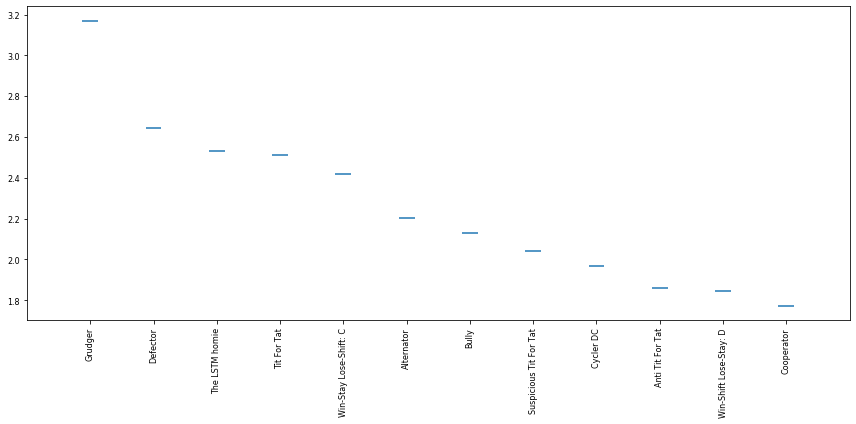

In [35]:
plot = axl.Plot(results)
p = plot.boxplot()
p.show()

In [36]:
player = player_class.LSTMPlayer(model, player_class.reshape_history_lstm_model, opening_probability=0)

In [37]:
strategies_tournament = [s() for s in axl.basic_strategies] + [player]
tournament = axl.Tournament(players=strategies_tournament, turns=205, repetitions=10)
results = tournament.play(progress_bar=False)

//anaconda3/envs/rnn/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


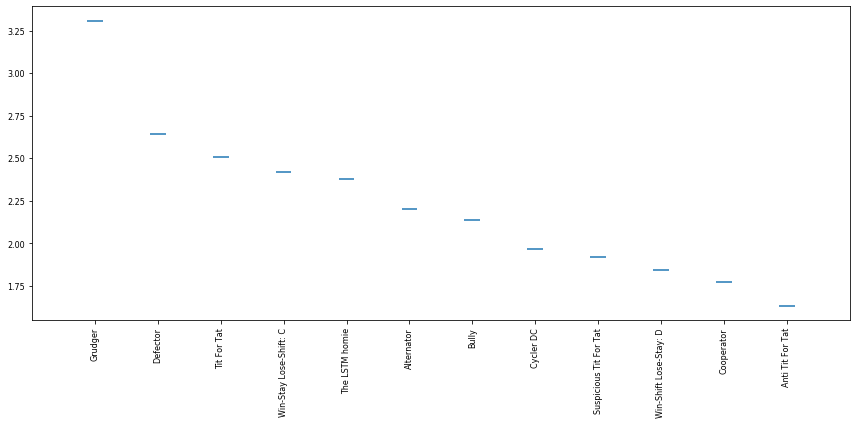

In [38]:
plot = axl.Plot(results)
p = plot.boxplot()
p.show()

**LSTM model sequence to sequence basic**

In [70]:
files_location = "basic/output_lstm_classification_5000/validation_measures_run_*.csv"
df = read_validation_dataframes(files_location)

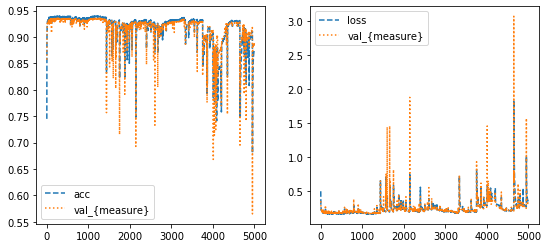

In [71]:
fig, ax = plt.subplots(ncols=2, figsize=(9, 4))

for i, measure in enumerate(['acc', 'loss']):
    ax[i].plot(df[measure], '--', label=measure);
    ax[i].plot(df[f'val_{measure}'], ':', label='val_{measure}');
    ax[i].legend();

In [24]:
files_location = "hawk_output/output_lstm_model_basic/validation_measures_run_100_*.csv"
df = read_validation_dataframes(files_location)

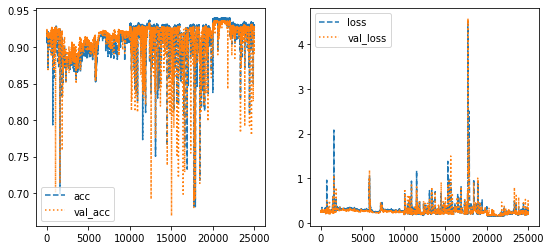

In [25]:
fig, ax = plt.subplots(ncols=2, figsize=(9, 4))

for i, measure in enumerate(['acc', 'loss']):
    ax[i].plot(df[measure], '--', label=measure);
    ax[i].plot(df[f'val_{measure}'], ':', label=f'val_{measure}');
    ax[i].legend();

In [12]:
# model = player_class.read_model_sequence_to_sequence('hawk_output/output_lstm_model_basic/weights-over-time.h5')
model = player_class.read_model_sequence_to_sequence('basic/output_lstm/model-over-time.h5')

In [13]:
player = player_class.LSTMPlayer(model,
                                 player_class.reshape_history_lstm_model)

In [14]:
strategies_tournament = [s() for s in axl.basic_strategies] + [player]
tournament = axl.Tournament(players=strategies_tournament,
                            turns=200,
                            repetitions=5)
results = tournament.play(progress_bar=False)

//anaconda3/envs/rnn/lib/python3.6/site-packages/dask/base.py:835: UserWarning: The get= keyword has been deprecated. Please use the scheduler= keyword instead with the name of the desired scheduler like 'threads' or 'processes'
  warnings.warn("The get= keyword has been deprecated. "


In [15]:
color = "#ffffff"

In [16]:
import matplotlib
font = {"size": 20, "weight": "bold"}
matplotlib.rc("font", **font)

In [17]:
def violinplot(
    data, res):
    """For making violinplots."""

    _, ax = plt.subplots()

    figure = ax.get_figure()
    width = max(self.num_players / 3, 12)
    height = width / 2
    spacing = 4
    positions = spacing * arange(1, self.num_players + 1, 1)
    figure.set_size_inches(width, height)
    ax.violinplot(
        data,
        positions=positions,
        widths=spacing / 2,
        showmedians=True,
        showextrema=False,
    )
    ax.set_xticks(positions)
    ax.set_xticklabels(names, rotation=90)
    ax.set_xlim([0, spacing * (self.num_players + 1)])
    ax.tick_params(axis="both", which="both", labelsize=8)
    if title:
        ax.set_title(title)
    plt.tight_layout()
    return figure

In [18]:
plot = axl.Plot(results)

In [19]:
data = plot._boxplot_dataset

In [20]:
from numpy import arange

In [25]:
names = plot._boxplot_xticks_labels

In [26]:
names

['The LSTM homie',
 'Grudger',
 'Defector',
 'Tit For Tat',
 'Win-Stay Lose-Shift: C',
 'Bully',
 'Alternator',
 'Cycler DC',
 'Suspicious Tit For Tat',
 'Win-Shift Lose-Stay: D',
 'Anti Tit For Tat',
 'Cooperator']

In [27]:
names[0] = 'LSTM player'

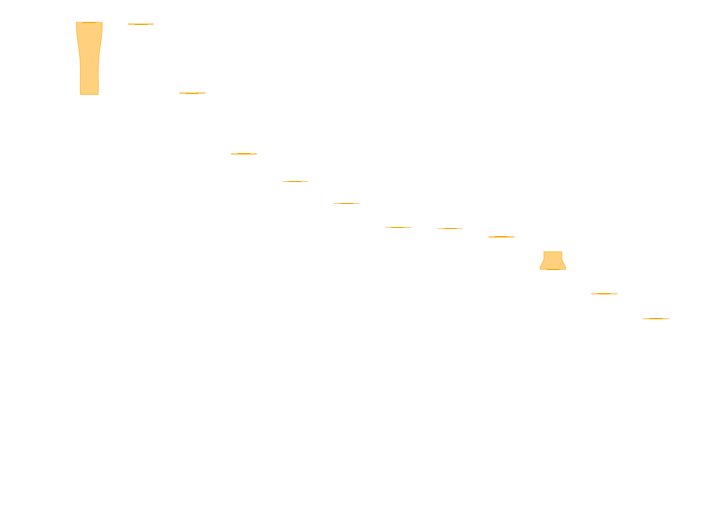

In [28]:
_, ax = plt.subplots()

figure = ax.get_figure()
width = max(results.num_players / 4, 12)
height = width / 2
spacing = 4
positions = spacing * arange(1, results.num_players + 1, 1)
figure.set_size_inches(width, height)
violin_parts = ax.violinplot(
    data,
    positions=positions,
    widths=spacing / 2,
    showmedians=True,
    showextrema=False,
)

for vp in violin_parts['bodies']:
    vp.set_facecolor('orange')
    vp.set_edgecolor('orange')
    vp.set_linewidth(1)
    vp.set_alpha(0.5)

for partname in ('cmedians',):
    vp = violin_parts[partname]
    vp.set_edgecolor('orange')
    vp.set_linewidth(1)
        
ax.set_xticks(positions)
ax.set_xticklabels(names, rotation=90)
ax.set_xlim([0, spacing * (results.num_players + 1)])
ax.tick_params(axis="both", which="both", labelsize=13)


ax.spines['bottom'].set_color(color)
ax.spines['top'].set_color(color) 
ax.spines['right'].set_color(color)
ax.spines['left'].set_color(color)

ax.tick_params(axis='x', colors=color)
ax.tick_params(axis='y', colors=color)

plt.savefig(f'/Users/storm/src/talks/talks/2020-02-26-Max-Planck/static/lstm_performance.png',
            bbox_inches='tight',
            transparent=True, dpi=200)

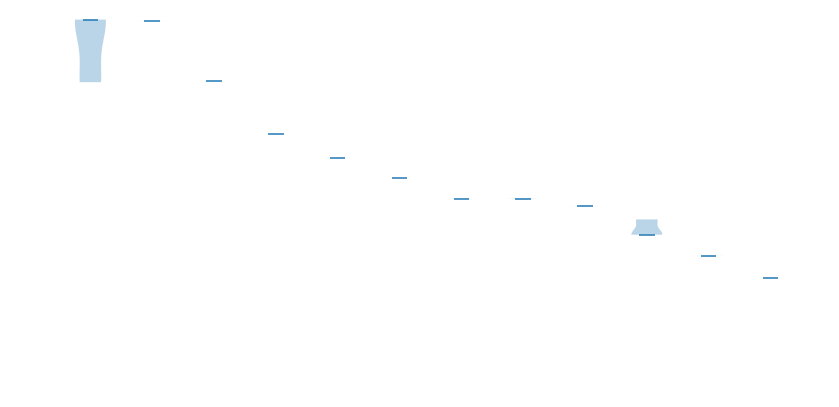

In [38]:
fig, axes = plt.subplots(figsize=(7, 5))

plot = axl.Plot(results)
boxes = plot.boxplot(ax=axes)

# for vp in boxes['bodies']:
#     vp.set_facecolor('orange')
#     vp.set_edgecolor('orange')
#     vp.set_linewidth(1)
#     vp.set_alpha(0.5)


axes.spines['bottom'].set_color(color)
axes.spines['top'].set_color(color) 
axes.spines['right'].set_color(color)
axes.spines['left'].set_color(color)

axes.tick_params(axis='x', colors=color)
axes.tick_params(axis='y', colors=color)

plt.savefig(f'/Users/storm/src/talks/talks/2020-02-26-Max-Planck/static/lstm_performance.png',
            bbox_inches='tight',
            transparent=True, dpi=200)

In [ ]:
    for vp in violin_parts['bodies']:
        vp.set_facecolor('orange')
        vp.set_edgecolor('orange')
        vp.set_linewidth(1)
        vp.set_alpha(0.5)
        
    for partname in ('cbars','cmins','cmaxes'):
        vp = violin_parts[partname]
        vp.set_edgecolor('orange')
        vp.set_linewidth(1)
        
        for bp in boxes['medians']:
            bp.set_color('orange')
            bp.set_linewidth(4)
            bp.set_linestyle('-.')
        for bp in boxes['caps']:
            bp.set_color(color)
            bp.set_linewidth(3)
        for bp in boxes['whiskers']:
            bp.set_color(color)
            bp.set_linewidth(3)
        for bp in boxes['boxes']:
            bp.set_color(color)
            bp.set_linewidth(3)

**Non stochastic**

In [44]:
player = player_class.LSTMPlayer(model, player_class.reshape_history_lstm_model, opening_probability=1)

In [45]:
strategies_tournament = [s() for s in axl.basic_strategies] + [player]
tournament = axl.Tournament(players=strategies_tournament, turns=205, repetitions=10)
results = tournament.play(progress_bar=False)

//anaconda3/envs/rnn/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


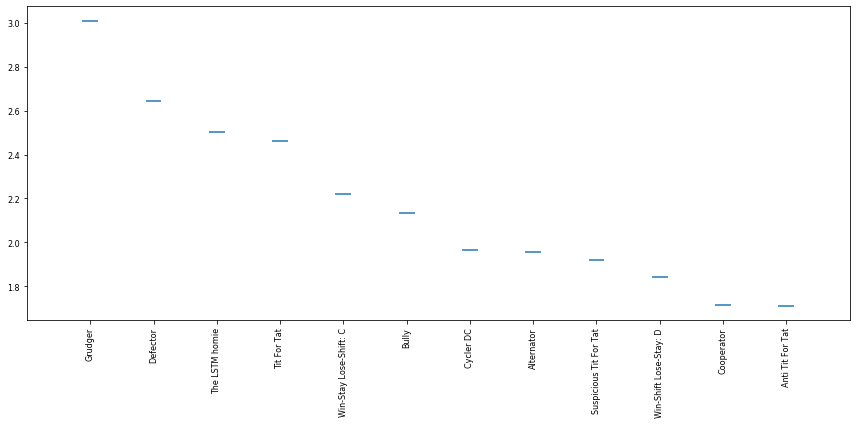

In [46]:
plot = axl.Plot(results)
p = plot.boxplot()
p.show()

In [48]:
player = player_class.LSTMPlayer(model, player_class.reshape_history_lstm_model, opening_probability=0)

In [49]:
strategies_tournament = [s() for s in axl.basic_strategies] + [player]
tournament = axl.Tournament(players=strategies_tournament, turns=205, repetitions=10)
results = tournament.play(progress_bar=False)

//anaconda3/envs/rnn/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


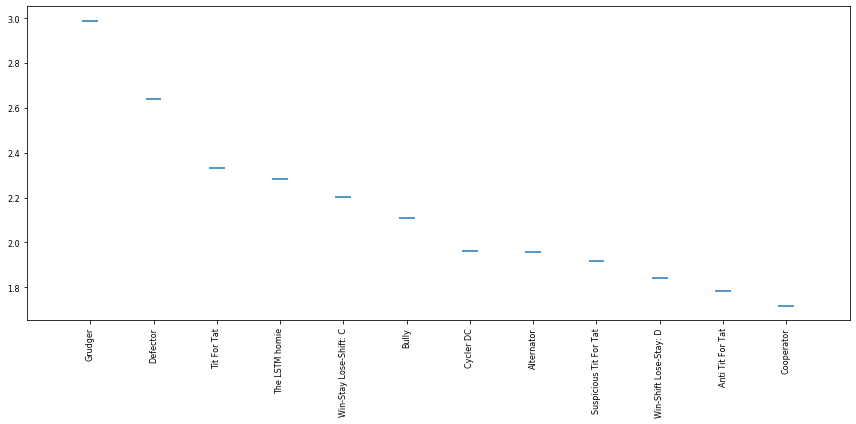

In [50]:
plot = axl.Plot(results)
p = plot.boxplot()
p.show()

- fingerprints on LSTM and grudger and others. 
- Both types of fingerprints

- Transitive against the basic, against these strategies, and Ashlocks against all these. 

In [72]:
model = player_class.read_model_sequence_to_sequence('basic/output_lstm/model-over-time.h5')
player_old = player_class.LSTMPlayer(model,
                                 player_class.reshape_history_lstm_model)

In [77]:
model = player_class.read_model_sequence_to_sequence('hawk_output/output_lstm_model_basic/final_lstm_model_2.h5')

player_new = player_class.LSTMPlayer(model,
                                 player_class.reshape_history_lstm_model)

In [74]:
axl.seed(0)  # Fingerprinting is a random process
probe = axl.TitForTat
af = axl.AshlockFingerprint(player_old, probe)
data = af.fingerprint(turns=10, repetitions=2, step=0.2)

100%|██████████| 72/72 [00:00<00:00, 559.22it/s]


//anaconda3/envs/rnn/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


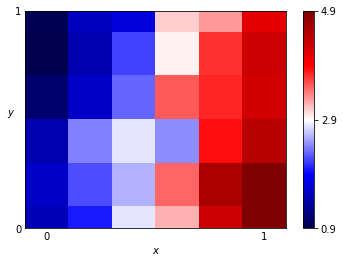

In [75]:
p = af.plot()
p.show()

100%|██████████| 72/72 [00:00<00:00, 107.67it/s]
//anaconda3/envs/rnn/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


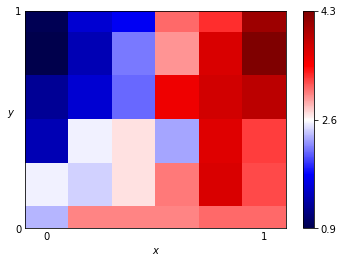

In [78]:
axl.seed(0)  # Fingerprinting is a random process
probe = axl.TitForTat
af = axl.AshlockFingerprint(player_new, probe)
data = af.fingerprint(turns=10, repetitions=2, step=0.2)

p = af.plot()
p.show()